Cristina Cicali, Clelia Corridori, Anna Steffinlongo

# OTOC for different values of h effective


In [1]:
#Call of all the libreries
from numpy import *
import math
import matplotlib.pyplot as plt
from OTOCfunc import *


In [2]:
#Parameters to compute the Out-Of-Time-Ordered-Correlator OTOC for different values of h effective 
# N is the number for the space/momentum discretization. 
# T is the period of the kicks which is proportional to heff
# kicking strenght is K=4
# Nkicks is the number of kicks.
 
N=2**14
T=[2**-2,2**-4,2**-6,2**-8]
K=4
Nkicks=100
trials=50

In [5]:
# Check the correct type of each parameter and its sign if needed.
# N
if (issubclass(type(N),int)):
    ()
else:
    print("Wrong type!")
    print("N is", type(N), ", it must be int!")
    sys.exit()
if (N<0):
    print("N must be greater than 0!")
    sys.exit()

# K
if (issubclass(type(K),int) or issubclass(type(K),float)):
    ()
else:
    print("Wrong type!")
    print("K is", type(K), ", it must be float or int!")
    sys.exit()
if (K<0):
    print("K must be greater than 0!")
    sys.exit()

# T
for tt in T:
    if (issubclass(type(tt),int) or issubclass(type(tt),float)):
        ()
    else:
        print("Wrong type!")
        print("T is", type(tt), ", it must be float or int!")
    if (tt<0):
        print("T must be greater than 0!")
        sys.exit()

# Nkicks
if (issubclass(type(Nkicks),int)):
    ()
else:
    print("Wrong type!")
    print("Nkicks is", type(Nkicks), ", it must be int!")
    sys.exit()
if (Nkicks<0):
    print("Nkicks must be greater than 0!")
    sys.exit()

# trials
if (issubclass(type(trials),int)):
    ()
else:
    print("Wrong type!")
    print("Trials is", type(trials), ", it must be int!")
    sys.exit()
if (trials<0):
    print("Trials must be greater than 0!")
    sys.exit()

ii=0
# NT relation check
for tt in T:
    if(N*tt<2**6 or N*tt>2**15):
        print("Warning! N*T out of range for T number",ii)
    ii=ii+1

In [4]:
#Computation of the mean of the OTOC over the number of trials with the function mean_otoc_heff contained in the 
#python file OTOCfunc.py
mean_C=mean_otoc_heff(N,T,K,Nkicks,trials,True)

#Vector for the number of kicks
Kick=arange(1,Nkicks+1,1)

Trial # 0
Trial # 1
Trial # 2
Trial # 3
Trial # 4
Trial # 5
Trial # 6
Trial # 7
Trial # 8
Trial # 9
Trial # 10
Trial # 11
Trial # 12
Trial # 13
Trial # 14
Trial # 15
Trial # 16
Trial # 17
Trial # 18
Trial # 19
Trial # 20
Trial # 21
Trial # 22
Trial # 23
Trial # 24
Trial # 25
Trial # 26
Trial # 27
Trial # 28
Trial # 29
Trial # 30
Trial # 31
Trial # 32
Trial # 33
Trial # 34
Trial # 35
Trial # 36
Trial # 37
Trial # 38
Trial # 39
Trial # 40
Trial # 41
Trial # 42
Trial # 43
Trial # 44
Trial # 45
Trial # 46
Trial # 47
Trial # 48
Trial # 49


In [6]:
#Due to the time needed for the computation of the OTOC we saved the data in a txt file in order to only load
#the file when needed
# Set saveF=True to save the file
saveF=False
if saveF==True:
    with open('OTOC-50trials-mean-OTOCheff.txt', 'w') as out:
        for line in mean_C:
            savetxt(out, line)


In [7]:
# To load data from a txt file set load=True
load=True
if load==True:
    # The value selected here must be the same of the quantities above chosen for the saved file!
    N=2**14
    T=[2**-2,2**-4,2**-6,2**-8]
    K=4
    Nkicks=100
    Kick=arange(1,Nkicks+1,1)

    data = loadtxt("OTOC-50trials-mean-OTOCheff.txt", comments="#", delimiter="\n", unpack=False)
    mean_C=reshape(data.astype(float),(Nkicks,len(T)))

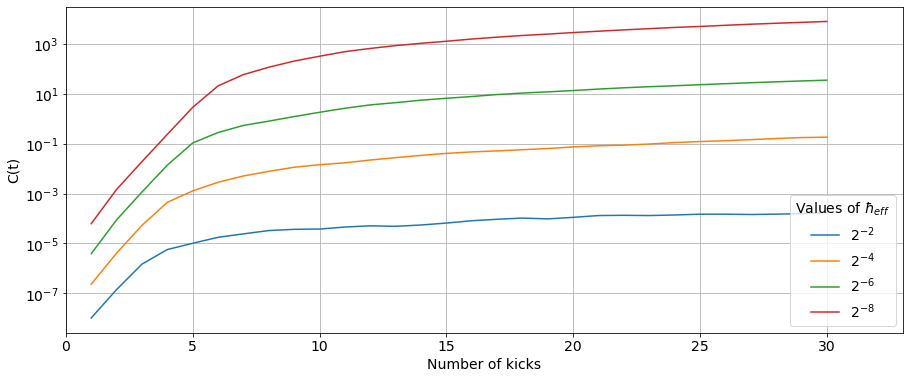

In [8]:
#Plot of the OTOC as function of the number of kicks for different values of h_eff, setting the log 
#scale in the y axis. 
plt.figure(figsize=(15, 6))
plt.yscale('log')

for ii in range(len(T)):
    plt.plot(Kick[:30],mean_C[:30,ii])    
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']

plt.legend(label, loc='lower right',title='Values of $\hbar_{eff}$', fontsize='14',title_fontsize=14)
plt.xlim([0,33])
plt.xlabel('Number of kicks', size=14)
plt.ylabel('C(t)', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.grid()
plt.savefig('OTOC-heff.png', dpi=100)

In [9]:
#Computation of the logarithm (variable log_C) of the OTOC. 
log_C_eff=zeros([Nkicks,len(T)])

for jj in range(1,Nkicks):
    log_C_eff[jj,:]=log(mean_C[jj,:]/mean_C[0,:])/(2*jj)
    
#Computation of the asymptotic behaviour which is proportional to t^-1
def asymp(Kick):
    return((1/Kick[1:])*11)

funz_t=asymp(Kick)    



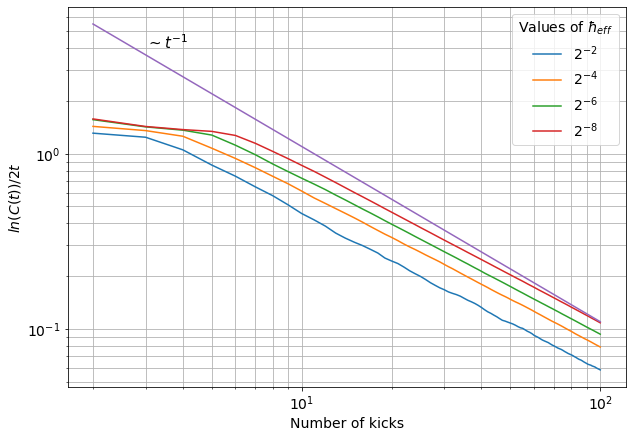

In [10]:
#Plot of log_C_eff Vs the time for different values of h_eff and the asymptotic value. This function 
#is plotted setting the log scale both on x and y axis. 

plt.figure(figsize=(10, 7))
plt.xscale('log')
plt.yscale('log')
for kk in range(len(T)):
    plt.plot(arange(2,Nkicks+1),log_C_eff[1:,kk]) 
label=['$2^{-2}$','$2^{-4}$','$2^{-6}$','$2^{-8}$']


plt.plot(Kick[1:],funz_t[:])
plt.text(3, 4, "$\sim t^{-1}$", fontsize=15)
plt.legend(label, loc='upper right', title='Values of $\hbar_{eff}$', title_fontsize=14, fontsize=14)
plt.xlabel('Number of kicks', size=14)
plt.ylabel('$ln (C(t)) /2t$', size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.savefig('OTOClog-log.png', dpi=100)
plt.grid(True, which="both")

plt.savefig('OTOClog-log-heff.png', dpi=100)